# Big Mart Sales Prediction

<u>**Assignment Objective**</u>: Given a training dataset (~8k rows), predict product sales for the given test dataset (~5k rows)

<u>**Notebook Objective**</u>: Exploratory Data Analysis, Feature Engineering and Data Transformations for training ML models downstream

**Content**:
1. Data Exploration
2. Data Cleaning
3. Univariate Analysis
4. Target Analysis (Bivariate)
5. Feature Engineering and Data Transformations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

train = df_train.copy()
test = df_test.copy()

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We'll use pandas's .info() and .describe() methods to understand a bit more about the data types of the columns and their brief distribution summary respecitively.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We have 7 categorical columns and 4 numerical columns, one of which is our target variable - Item_Output_Sales

In [5]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


Now let's check for any missing values in the train/test sets provided to us.

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Looks like both have identical features with missing values --> Item_Weight & Outlet_Size. We'll dig a little bit more into the data before deciding our data imputation stategy.

Let's first see where exactly we are missing the data.

In [8]:
train[train.Outlet_Size.isnull()].groupby(['Outlet_Identifier','Outlet_Establishment_Year']).count().index

MultiIndex([('OUT010', 1998),
            ('OUT017', 2007),
            ('OUT045', 2002)],
           names=['Outlet_Identifier', 'Outlet_Establishment_Year'])

The outlets - OUT010, OUT017 & OUT045 - are the only outlets missing their size information. We cannot rely on information from other outlets to fill them since they are independent. What is not independent however is the outlet type information. We'll use that later to fill the missing values.

In [9]:
train[train.Item_Weight.isnull()].Outlet_Establishment_Year.value_counts()

Outlet_Establishment_Year
1985    1463
Name: count, dtype: int64

The store established in 1985 is missing all it's weight information for a product (loss of data or no tracking in place?). Since weight is very much product dependent, we can actually use the mean product weight of a particular product_id to fill these values.

In [10]:
(train.Item_Visibility == 0).sum()

np.int64(526)

Another point of interest is the item visibility. By definition, it should have values > 0 since the item definitely exists. We can treat this as another missing value and try to fill it up using mean product visibility of a particular product_id (like we are planning to do for weight).

---

## Data Cleaning

In [11]:
# Creating a mean product weight and visibility table grouped by item identifier to fill missing values

item_wise = train.groupby('Item_Identifier')[['Item_Weight','Item_Visibility']].mean()
item_wise

,Item_Weight,Item_Visibility
Item_Identifier,,
DRA12,11.600,0.031956
DRA24,19.350,0.048062
DRA59,8.270,0.134718
DRB01,7.390,0.082126
DRB13,6.115,0.008002
...,...,...
NCZ30,6.590,0.024956
NCZ41,19.850,0.051623
NCZ42,10.500,0.009044


In [12]:
# Finding the rows where product weight is NaN or product visibility is zero (for oth train and test set)

train_weight_missing = train.Item_Weight.isnull()
test_weight_missing = test.Item_Weight.isnull()

train_visibility_zero = train.Item_Visibility == 0
test_visibility_zero = test.Item_Visibility == 0

In [13]:
# Imputing mean product weight
train.loc[train_weight_missing,'Item_Weight'] = train.loc[train_weight_missing,'Item_Identifier'].apply(lambda x: item_wise.loc[x,'Item_Weight'])
test.loc[test_weight_missing,'Item_Weight'] = test.loc[test_weight_missing,'Item_Identifier'].apply(lambda x: item_wise.loc[x,'Item_Weight'])

# Filling global mean weight for any NaNs left for product IDs that were not present in our mean table
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
test.Item_Weight = test.Item_Weight.fillna(train.Item_Weight.mean())

train.Item_Weight.isnull().sum(), test.Item_Weight.isnull().sum()

(np.int64(0), np.int64(0))

In [14]:
# Imputing mean product visibility
train.loc[train_visibility_zero,'Item_Visibility'] = train.loc[train_visibility_zero,'Item_Identifier'].apply(lambda x: item_wise.loc[x,'Item_Visibility'])
test.loc[test_visibility_zero,'Item_Visibility'] = test.loc[test_visibility_zero,'Item_Identifier'].apply(lambda x: item_wise.loc[x,'Item_Visibility'])

(train.Item_Visibility==0).sum(), (test.Item_Visibility==0).sum()

(np.int64(0), np.int64(0))

With that, the product weight and visibility is taken care of. We'll eventually deal with the outlet size as well soon.

Now let's take a closer look at item identifier:

In [15]:
train.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      shape=(1559,), dtype=object)

Looks like all identifiers start with FD, DR or NC. If we compare with the Item_Type variable, it's clear that FD stands for all food items while DR for drinks and NC consists of hosehold goods and medicines, non-consumables.

In [16]:
# Adding Item_ID feature using Item_Identifier
train['Item_ID'] = train.Item_Identifier.apply(lambda x: x[:2])
test['Item_ID'] = test.Item_Identifier.apply(lambda x: x[:2])

We will now dig further into categorical features and see the counts of these labels. If some features have label counts too little, it's best to combine them to allow model to generalize better.

In [17]:
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

LF, reg, low fat --> Pretty obvious that they are same as Low Fat or Regular labels

In [18]:
# Mapping fat content values
fat_content_mapping = {'LF':'Low Fat',
                       'low fat':'Low Fat',
                       'reg': 'Regular'}

train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(fat_content_mapping)
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(fat_content_mapping)

In [19]:
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [20]:
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Too many categories here (again amongst food, drinks and non consumables). One option is to drop it, other is to reduce it and combine. We'll decide later if we want to drop it, for now let's combine the labels with low counts.

In [21]:
# Mapping item types
item_type_map = {'Soft Drinks': 'Drinks',
                 'Hard Drinks': 'Drinks',
                 'Meat':'Other Foods',
                 'Starchy Foods': 'Other Foods',
                 'Breakfast': 'Other Foods',
                 'Seafood': 'Other Foods',
                 'Breads': 'Other Foods',
                 'Others': 'Other Foods'}

train['Item_Type'] = train['Item_Type'].replace(item_type_map)
test['Item_Type'] = test['Item_Type'].replace(item_type_map)

In [22]:
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Other Foods              1167
Household                 910
Frozen Foods              856
Dairy                     682
Drinks                    659
Canned                    649
Baking Goods              648
Health and Hygiene        520
Name: count, dtype: int64

In [23]:
train.Outlet_Establishment_Year.value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

Given that it's a numerical column, it's best to make use of it the same way instead of creating category labels out of it.

One such way would be to find the age of the outlet --> 2013 - establishment year <-- We'll do this later during feature engineering

In [24]:
train.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [25]:
train.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [26]:
train.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

Earlier we observed that outlet size is also missing. We can actually rely on outlet type feature to help us identify what could be the potential size of the store based on whether it's a supermarket type 1/2/3 or a simple grocery store. To do that, we'll find the most likely size of the outlet based on it's type (basically using mode)

In [27]:
# Finding the mostl likely outlet size based on mode of it's outlet type
train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x: x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


As expected, the grocery stores and type1 supermarkets are typically small ones, with type 2/3 supermarkets being typically medium sized

In [28]:
size_by_storeType = train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x: x.mode())
train.loc[train.Outlet_Size.isnull(),'Outlet_Size'] = train.loc[train.Outlet_Size.isnull(),'Outlet_Type'].apply(lambda x: size_by_storeType[x])
test.loc[test.Outlet_Size.isnull(),'Outlet_Size'] = test.loc[test.Outlet_Size.isnull(),'Outlet_Type'].apply(lambda x: size_by_storeType[x])

In [29]:
train.Outlet_Size.isnull().sum(),test.Outlet_Size.isnull().sum()

(np.int64(0), np.int64(0))

Finally no more null values in the data!

Let's split the features into categorical and numerical ones to try to understand their distributions and inter-dependencies.

In [30]:
categorical = ['Item_ID','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Size']
numerical = ['Item_Weight','Item_Visibility','Item_MRP']
target = ['Item_Outlet_Sales']

---

## UNIVARIATE ANALYSIS

Text(0.5, 0.98, 'Histograms for numerical features')

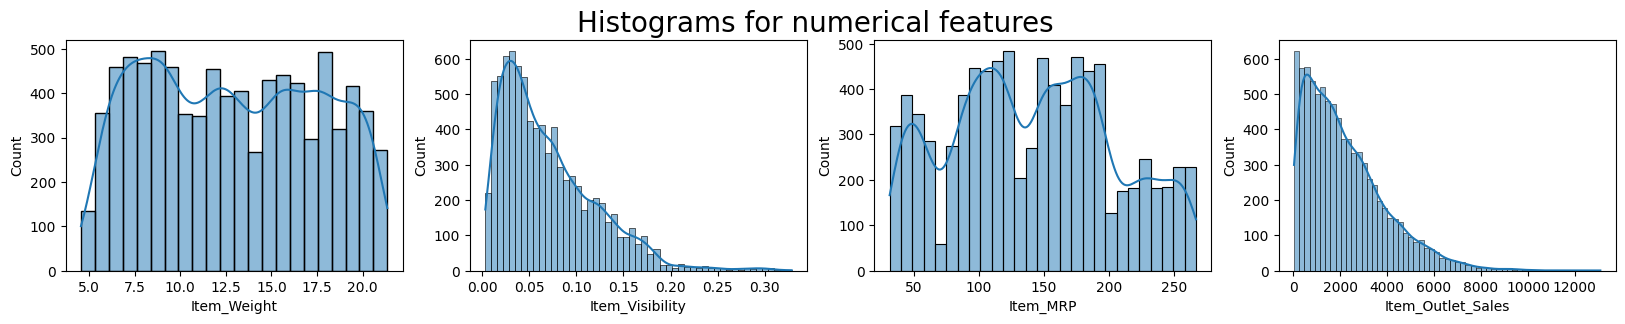

In [31]:
fig, ax = plt.subplots(1,4,figsize=(20,3))
for i,num in enumerate(numerical+target):
    sns.histplot(data=train,x=num,kde=True,ax=ax[i])

fig.suptitle('Histograms for numerical features',fontsize=20)

Text(0.5, 0.98, 'Box Plot for numerical features')

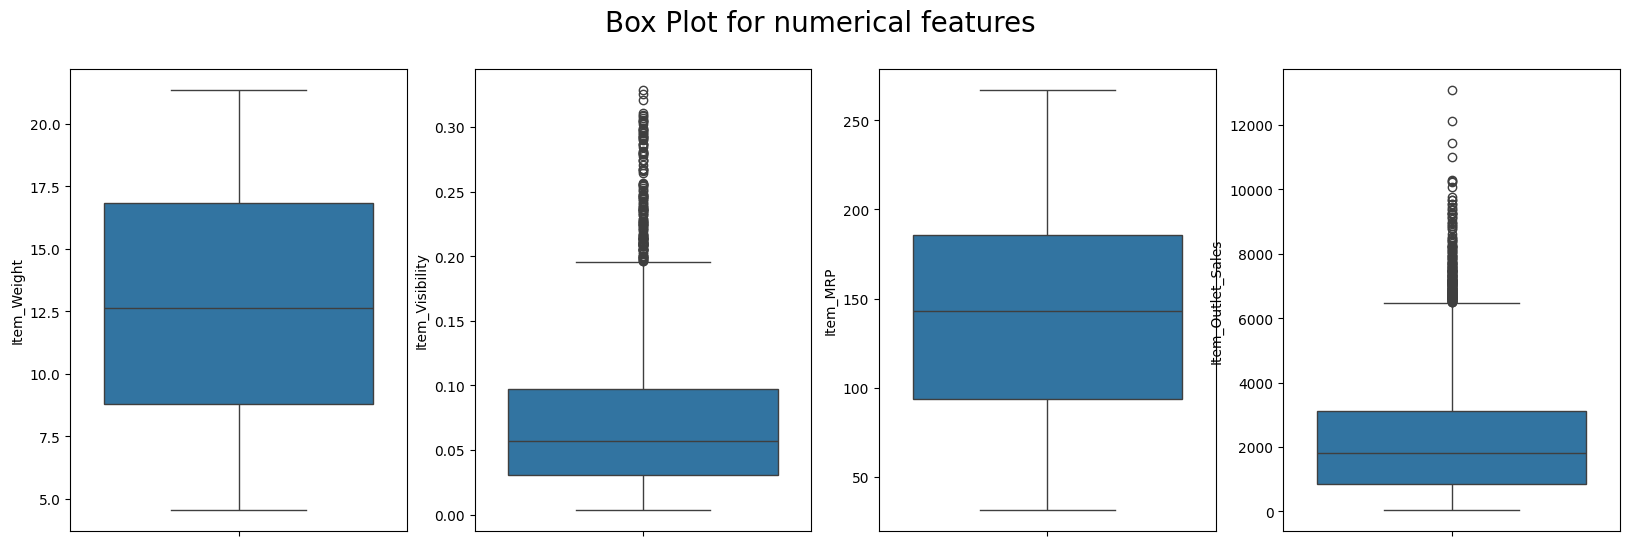

In [32]:
fig, ax = plt.subplots(1,4,figsize=(20,6))
for i,num in enumerate(numerical+target):
    sns.boxplot(data=train,y=num,ax=ax[i])

fig.suptitle('Box Plot for numerical features',fontsize=20)

<u>*Key Observations:*</u>
1. Item Weight seems uniformly distributed while Item MRP looks like a multi-modal distribution (with 4 peaks)
2. Both Item Visibility and Item Sales are heavily right skewed, with outliers at the right tail ends.

<u>*Potential Actions:*</u>
1. Item MRP can be used to derive an additonal feature with 4 categories (multimodal)
2. Item Visibility and Item Sales can be log-transformed OR their tails can be clipped to remove outliers

Text(0.5, 0.98, 'Categorical Features Label Distributions')

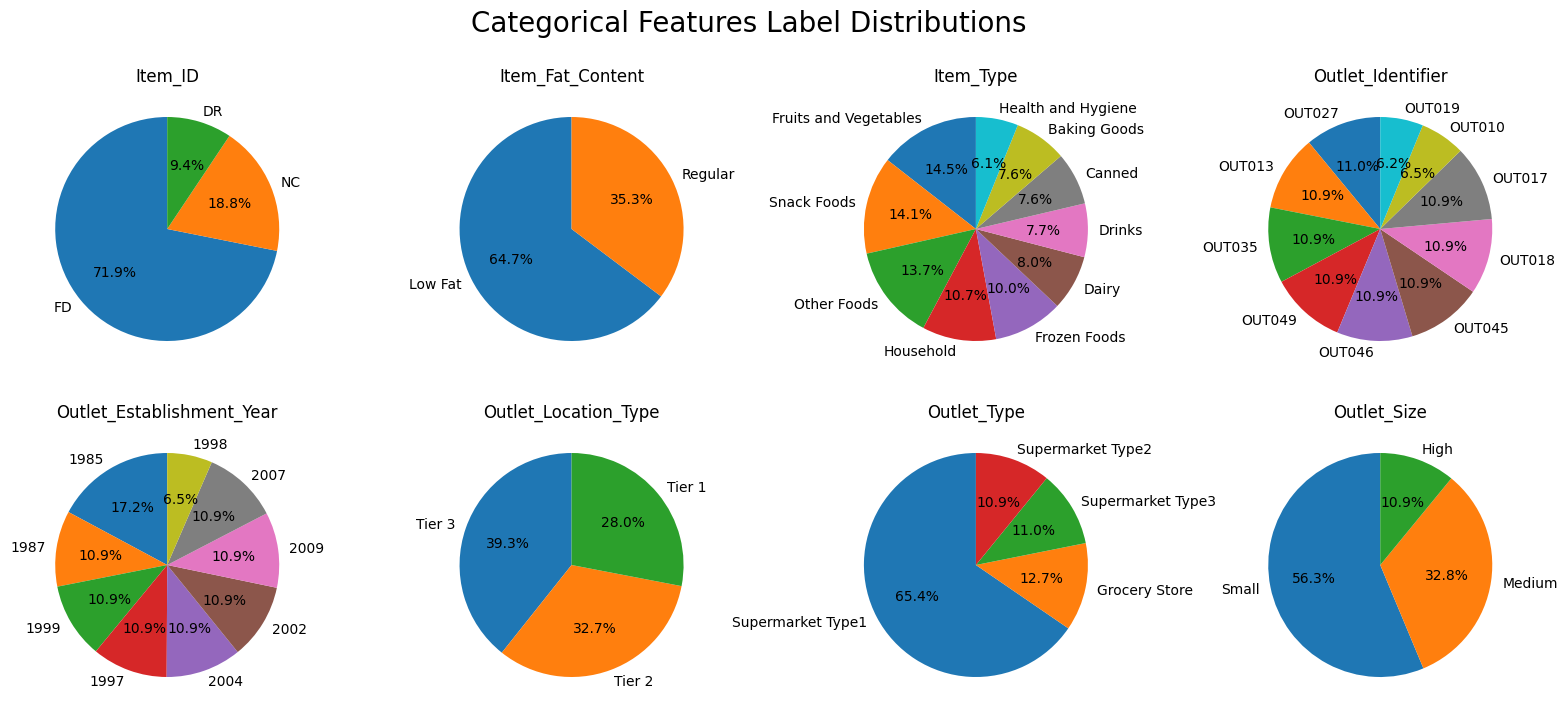

In [33]:
fig, ax = plt.subplots(2,4,figsize=(20,8))
ax = ax.flatten()
for i,cat in enumerate(categorical):
    train[cat].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,ylabel='',ax=ax[i])
    ax[i].set_title(cat)

fig.suptitle('Categorical Features Label Distributions',fontsize=20)

---

## Target Analysis (Bivariate)

In this section, we will try to understand how the target feature varies with different features.

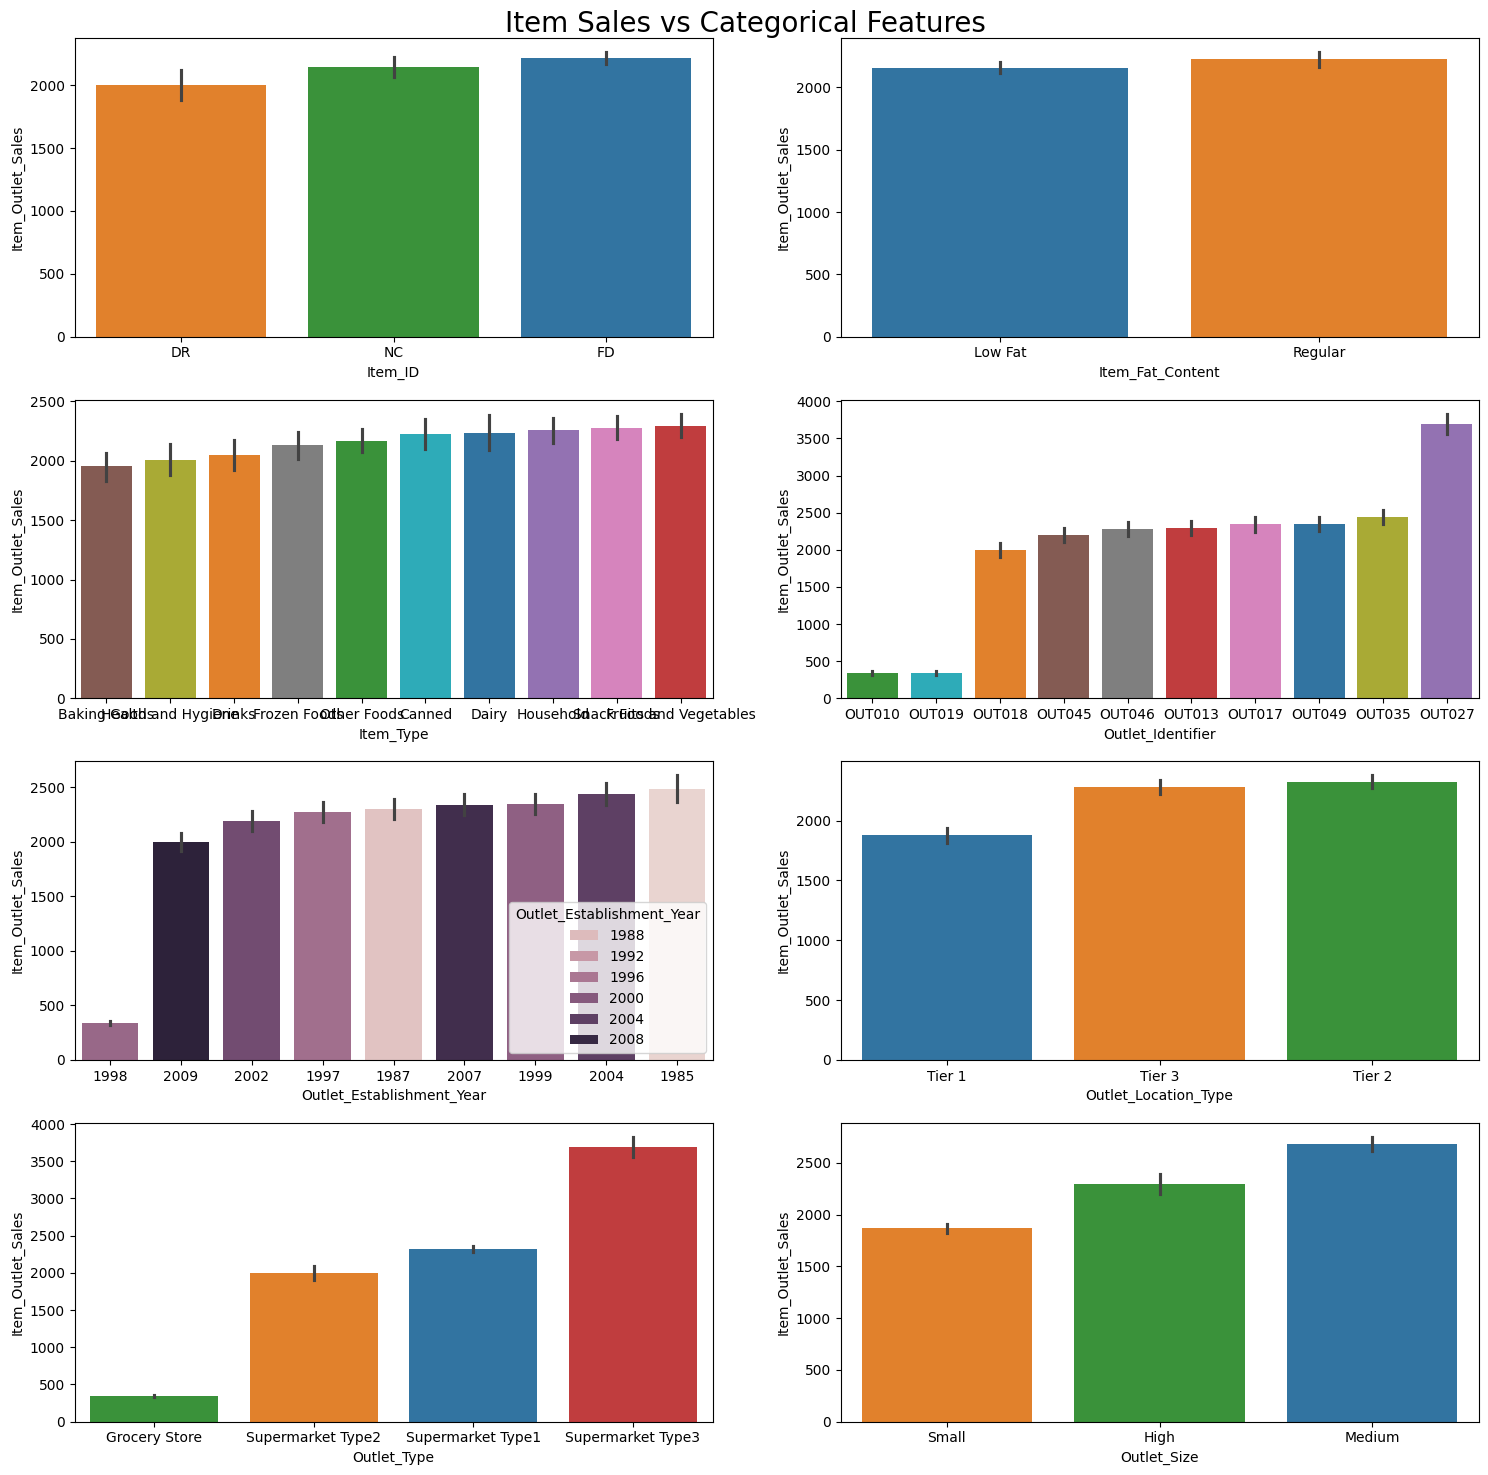

In [34]:
fig, ax = plt.subplots(4,2,figsize=(15,15))
ax = ax.flatten()
for i,cat in enumerate(categorical):
    sns.barplot(data=train,x=cat,y=target[0],hue=cat,order=train.groupby(cat)[target[0]].mean().sort_values().index.values,ax=ax[i])

fig.suptitle('Item Sales vs Categorical Features',fontsize=20)
plt.tight_layout()

<u>*Key Observations:*</u>
1. Outlet Identifier seems to have 3 levels --> 2 outlets have low contribution, 6 medium, and 1 outlet seems to have the largest contribution to the sales
2. Item Type and Establishment year doesn't seem to have significantly varying contribution to sales across different labels
3. Outlet location, type and size seem to have significantly varying impact across their labels

<u>*Potential Actions:*</u>
1. Reduce outlet identifier feature to 3 categories
2. Drop establishment year and item type categories
3. Label encode location, type and size since they show ordinal behaviour

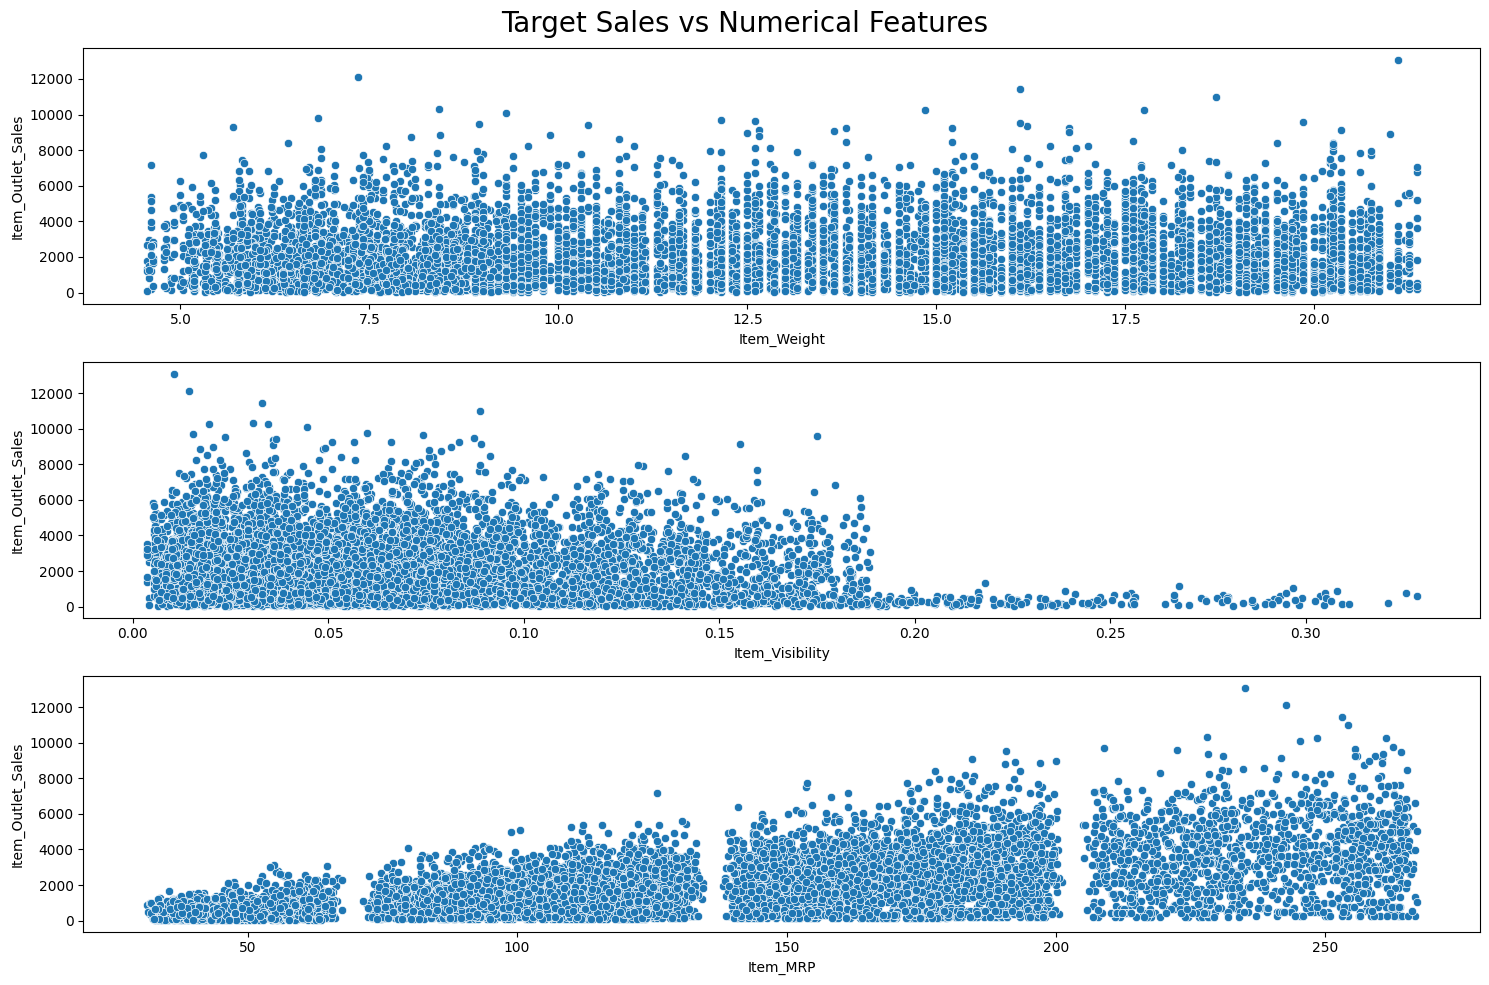

In [35]:
fig, ax = plt.subplots(3,1,figsize=(15,10))
for i,num in enumerate(numerical):
    sns.scatterplot(data=train,x=num,y=target[0],ax=ax[i])

fig.suptitle('Target Sales vs Numerical Features',fontsize=20)
plt.tight_layout()

<u>*Key Observations:*</u>
1. Item Weight sdoes not seem to have any obvious relationship with the sales count.
2. As mentioned earlier, Item MRP has **4** very clearly distinguishable zones.
2. Item Visibility seems to be negatively correlated here, but it's not very obvious + the presence of outliers

<u>*Potential Actions:*</u>
1. Derive a Item MRP Group feature with 4 labels for the 4 zones in the MRP distribution
2. Log transform item visibility to deal with outliers and see if the relationship with sales improves

---

## Feature Engineering and Data Transformations

In this section we will finally take actions to add/modify features in our dataset that we believe might add more predictive power for our ML models

Since we will be dropping outlet establishment year, we will create a outlet age feature first. Here we use 2013 since the data was collected during that year.

In [36]:
# Creating outlet age out using establishment year
train['Outlet_Age'] = train['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)
test['Outlet_Age'] = test['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

As mentioned earlier, we will now log transform the item visibility and create categories out of MRP distribution

**NOTE**: Commented out features were found to actually damage the leaderboard score and were not improving the model

In [37]:
# Log-transformation --> Visibility
train['Item_Visibility'] = np.log(train['Item_Visibility'])
test['Item_Visibility'] = np.log(test['Item_Visibility'])

# Log-transformation --> Target
# train['Item_Outlet_Sales'] = np.log(train['Item_Outlet_Sales'])
# test['Item_Outlet_Sales'] = np.log(test['Item_Outlet_Sales'])

# Creating new categorical feature using MRP column
train['Item_MRP_Group'] = pd.cut(train['Item_MRP'],bins=[0,70,136,203,267],labels=['A','B','C','D'])
test['Item_MRP_Group'] = pd.cut(test['Item_MRP'],bins=[0,70,136,203,267],labels=['A','B','C','D'])

Let's try to add more features to the data to increase the predictive power of our ML models.

**NOTE**: Commented out features were found to actually damage the leaderboard score and were not improving the model

In [38]:
# Price (MRP) per unit weight --> This encodes the MRP information and shows the value an item can give per unit of weight
train['price/weight'] = train.apply(lambda x: x['Item_MRP']/x['Item_Weight'],axis=1)
test['price/weight'] = test.apply(lambda x: x['Item_MRP']/x['Item_Weight'],axis=1)

# The relative visibility of an item compared to its average visibility across all outlets
# train['item_vis_ratio'] = train.apply(lambda x: x['Item_Visibility']/item_wise['Item_Visibility'].loc[x['Item_Identifier']],axis=1)
# test['item_vis_ratio'] = test.apply(lambda x: x['Item_Visibility']/item_wise['Item_Visibility'].loc[x['Item_Identifier']],axis=1)

# Average MRP per outlet identifier
# mrp_by_outlet = train.groupby('Outlet_Identifier')['Item_MRP'].mean().to_dict()
# train['MRP_by_Outlet'] = train['Outlet_Identifier'].map(mrp_by_outlet)
# test['MRP_by_Outlet'] = test['Outlet_Identifier'].map(mrp_by_outlet)

# Average sales per outlet identifiers --> Encodes the sales performance of outlets and acts like a historical feature
# sales_by_outlet = train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().to_dict()
# train['Sales_by_Outlet'] = train['Outlet_Identifier'].map(sales_by_outlet)
# test['Sales_by_Outlet'] = test['Outlet_Identifier'].map(sales_by_outlet)

# Item MRP's square root seems much more correlated than item MRP itself
# train['Item_MRP_sqrt'] = np.sqrt(train['Item_MRP'])
# test['Item_MRP_sqrt'] = np.sqrt(test['Item_MRP'])

Finally, we will reduce the number of labels present in outlet identifier down to just 3 --> 'LOW', 'MED', 'HIGH'

In [39]:
# Finding rows where outlet contributions are LOW, MED, HIGH (refer to bivariate analysis plots)
train_low_outlets = train['Outlet_Identifier'].isin(['OUT010','OUT019'])
train_high_outlets = train['Outlet_Identifier'].isin(['OUT027'])
train_med_outlets = ~(train_low_outlets) & ~(train_high_outlets)

test_low_outlets = test['Outlet_Identifier'].isin(['OUT010','OUT019'])
test_high_outlets = test['Outlet_Identifier'].isin(['OUT027'])
test_med_outlets = ~(test_low_outlets) & ~(test_high_outlets)

# Assigning the labels to respective regions
train.loc[train_low_outlets,'Outlet_Identifier'] = 'LOW'
train.loc[train_med_outlets,'Outlet_Identifier'] = 'MED'
train.loc[train_high_outlets,'Outlet_Identifier'] = 'HIGH'

test.loc[test_low_outlets,'Outlet_Identifier'] = 'LOW'
test.loc[test_med_outlets,'Outlet_Identifier'] = 'MED'
test.loc[test_high_outlets,'Outlet_Identifier'] = 'HIGH'

Now here we will make two copies of our processed data:
1. One which will be utilized by ML models that require numerical data
2. One which will be utilized by catboost, since it can handle categories intrinsically

In [ ]:
# For training regular numerical ML models
train_ohe = train.copy()
test_ohe = test.copy()

# For training CatBoost Regressor
train_cat = train.copy()
test_cat = test.copy()

We will now encode some of the labels numerically (to reduce the number of columns we make during one hot encoding)

**NOTE**: A faster way would be to use LabelEncoder from sklearn

In [41]:
train_ohe['Item_ID'] = train_ohe['Item_ID'].map({'DR':0,'NC':1,'FD':2})
test_ohe['Item_ID'] = test_ohe['Item_ID'].map({'DR':0,'NC':1,'FD':2})

train_ohe['Item_Fat_Content'] = train_ohe['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
test_ohe['Item_Fat_Content'] = test_ohe['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

train_ohe['Outlet_Size'] = train_ohe['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
test_ohe['Outlet_Size'] = test_ohe['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

train_ohe['Outlet_Type'] = train_ohe['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
test_ohe['Outlet_Type'] = test_ohe['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})

train_ohe['Outlet_Location_Type'] = train_ohe['Outlet_Location_Type'].apply(lambda x: int(x[-1]))
test_ohe['Outlet_Location_Type'] = test_ohe['Outlet_Location_Type'].apply(lambda x: int(x[-1]))

In [42]:
# Dropping columns that have been utilized for feature engineering and not needed anymore in their current capacity
train_ohe.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)
test_ohe.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)

train_cat.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)
test_cat.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)

Now let's do one hot encoding. We will keep all the columns and not drop any since we won't be using Linear Regression or any ML model which has problems with multicollinearity

In [43]:
cats = ['Outlet_Identifier','Item_MRP_Group']

train_ohe = pd.get_dummies(train_ohe,columns=cats,dtype=int)
test_ohe = pd.get_dummies(test_ohe,columns=cats,dtype=int)

##### **Saving the files**

In [44]:
train_ohe.to_csv('../data/df_train_ohe.csv')
test_ohe.to_csv('../data/df_test_ohe.csv')

train_cat.to_csv('../data/df_train_cat.csv')
test_cat.to_csv('../data/df_test_cat.csv')